In this project, we analyze Walmart’s weekly sales data (2010–2012), which includes store-level performance, macroeconomic indicators, and holiday effects.

The goal of the project is to build a machine learning model that can predict weekly store sales while capturing seasonality, economic trends, and the impact of special events such as the Super Bowl, Thanksgiving, and Christmas.

In [28]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [29]:
df= pd.read_csv('Walmart.csv')

In [30]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [31]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [32]:
df.shape

(6435, 8)

In [33]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [34]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
#transforming the 'Date' column to datetime format

df['Date']=pd.to_datetime(df['Date'], dayfirst=True)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [37]:
super_bowl_dates = ['2010-02-12', '2011-02-11', '2012-02-10']
thanksgiving_dates = ['2010-11-26', '2011-11-25', '2012-11-23']
christmas_dates = ['2010-12-31', '2011-12-30', '2012-12-28']

df['Super_Bowl'] = df['Date'].isin(pd.to_datetime(super_bowl_dates)).astype(int)
df['Thanksgiving'] = df['Date'].isin(pd.to_datetime(thanksgiving_dates)).astype(int)
df['Christmas'] = df['Date'].isin(pd.to_datetime(christmas_dates)).astype(int)  
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Thanksgiving,Christmas
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,0,0,0
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,0,0,0
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,0,0,0
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,0,0,0


In [ ]:
df = df.sort_values(['Store', 'Date'])
for lag in [1, 2, 3]:
    df[f'lag_{lag}'] = df.groupby('Store')['Weekly_Sales'].shift(lag)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Thanksgiving,Christmas,lag_1,lag_2,lag_3
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,NaN,NaN,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,1643690.90,NaN,NaN
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,1641957.44,1643690.90,NaN
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,1611968.17,1641957.44,1643690.90
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,1409727.59,1611968.17,1641957.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,0,0,0,723086.20,702238.27,766512.66
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,0,0,0,713173.95,723086.20,702238.27
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,0,0,0,733455.07,713173.95,723086.20
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,0,0,0,734464.36,733455.07,713173.95


In [48]:
df['rolling_mean_4'] = df.groupby('Store')['Weekly_Sales'].shift(1).rolling(window=4).mean()
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Thanksgiving,Christmas,lag_1,lag_2,lag_3,rolling_mean_4
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,NaN,NaN,NaN,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,1643690.90,NaN,NaN,NaN
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,1641957.44,1643690.90,NaN,NaN
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,1611968.17,1641957.44,1643690.90,NaN
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,1409727.59,1611968.17,1641957.44,1.576836e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,0,0,0,723086.20,702238.27,766512.66,7.315338e+05
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,0,0,0,713173.95,723086.20,702238.27,7.262528e+05
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,0,0,0,733455.07,713173.95,723086.20,7.179884e+05
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,0,0,0,734464.36,733455.07,713173.95,7.260449e+05


In [49]:
df = df.dropna()

In [51]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Thanksgiving,Christmas,lag_1,lag_2,lag_3,rolling_mean_4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,1409727.59,1611968.17,1641957.44,1.576836e+06
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,0,0,0,1554806.68,1409727.59,1611968.17,1.554615e+06
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,0,0,0,1439541.59,1554806.68,1409727.59,1.504011e+06
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,0,0,0,1472515.79,1439541.59,1554806.68,1.469148e+06
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,0,0,0,1404429.92,1472515.79,1439541.59,1.467823e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,0,0,0,723086.20,702238.27,766512.66,7.315338e+05
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,0,0,0,713173.95,723086.20,702238.27,7.262528e+05
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,0,0,0,733455.07,713173.95,723086.20,7.179884e+05
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,0,0,0,734464.36,733455.07,713173.95,7.260449e+05


In [57]:
print(df['Store'].nunique())

45


EDA

Text(0.5, 1.0, 'Total Weekly Sales Over Time')

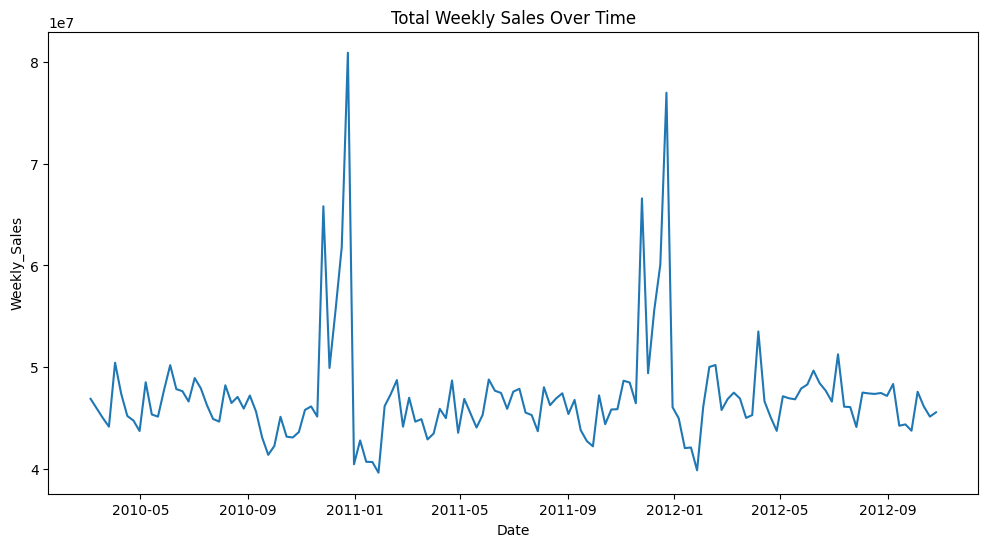

In [59]:
sales_over_time = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='Date', y='Weekly_Sales')
plt.title('Total Weekly Sales Over Time')

Text(0, 0.5, 'Average Weekly Sales')

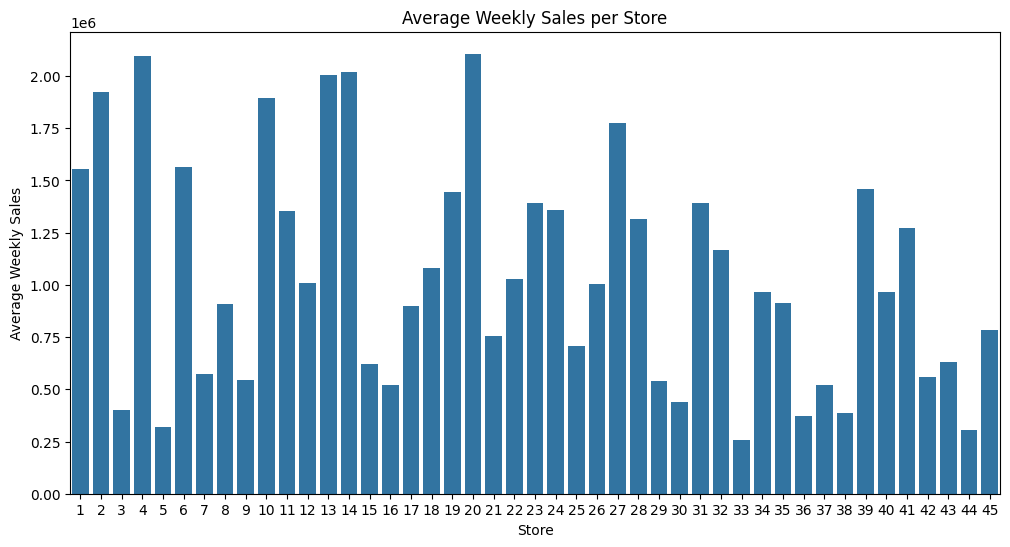

In [60]:
sales_per_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_per_store, x='Store', y='Weekly_Sales')
plt.title('Average Weekly Sales per Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')

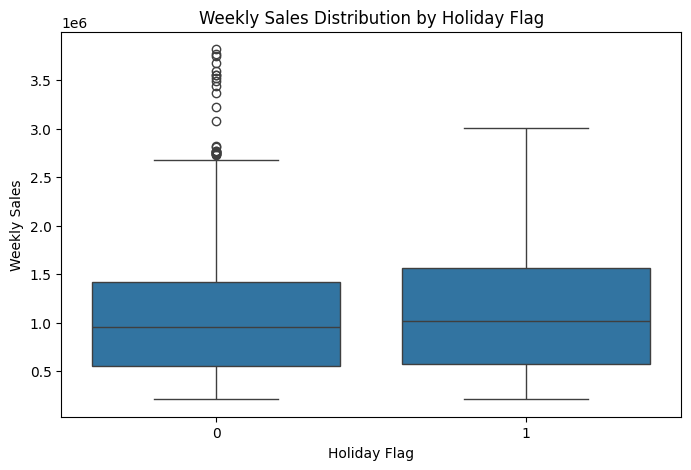

In [62]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Holiday_Flag',y='Weekly_Sales')
plt.title('Weekly Sales Distribution by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.show()

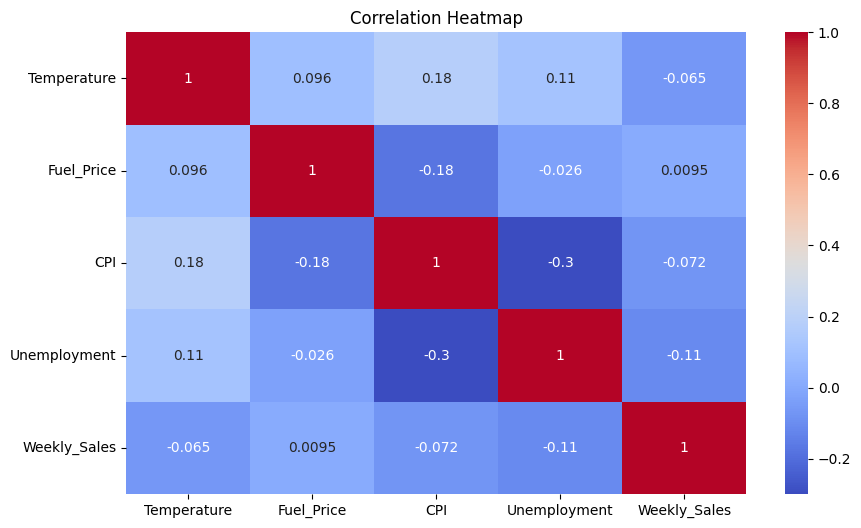

In [63]:
features=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
corr=df[features+['Weekly_Sales']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

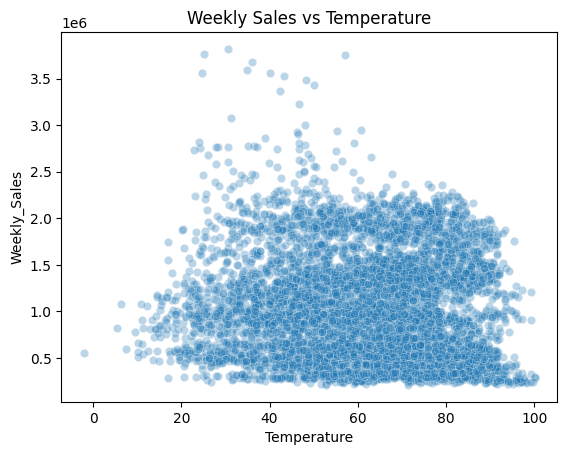

In [64]:
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', alpha=0.3)
plt.title('Weekly Sales vs Temperature')
plt.show

C:\Users\karim\AppData\Local\Temp\ipykernel_1348\365431128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
C:\Users\karim\AppData\Local\Temp\ipykernel_1348\365431128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week']=df['Date'].dt.isocalendar().week


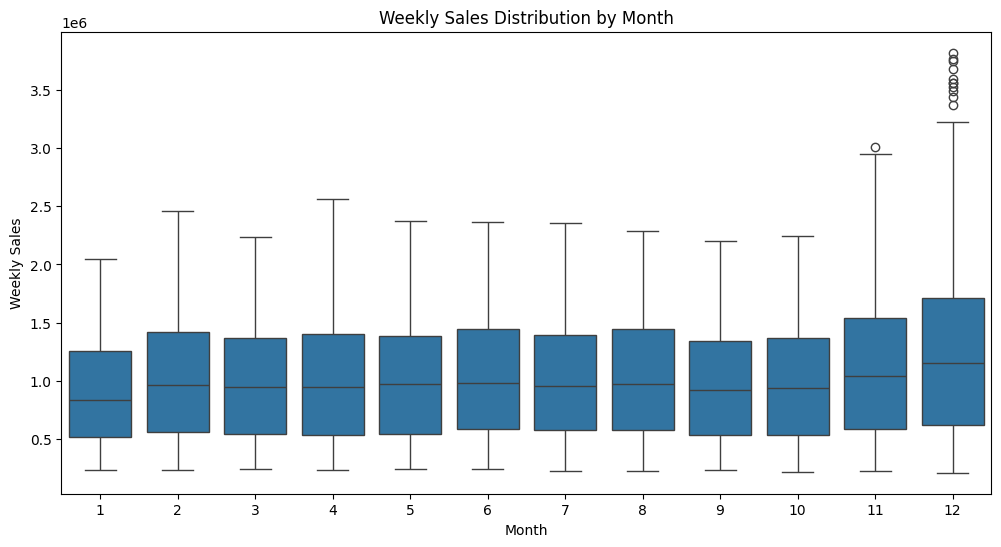

In [66]:
df['Month'] = df['Date'].dt.month
df['Week']=df['Date'].dt.isocalendar().week

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Weekly_Sales')
plt.title('Weekly Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

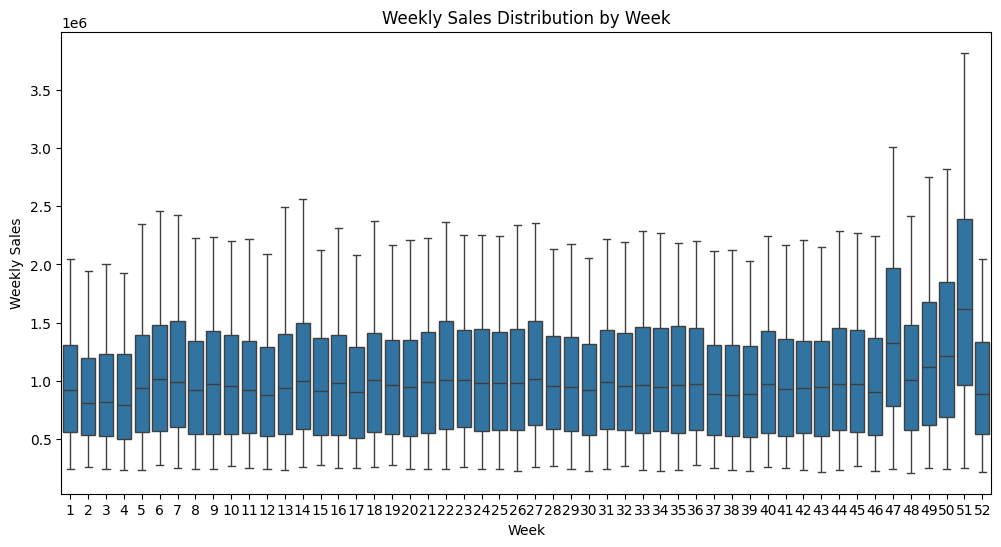

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Week', y='Weekly_Sales')
plt.title('Weekly Sales Distribution by Week of Year')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.show() 

C:\Users\karim\AppData\Local\Temp\ipykernel_1348\323375856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year


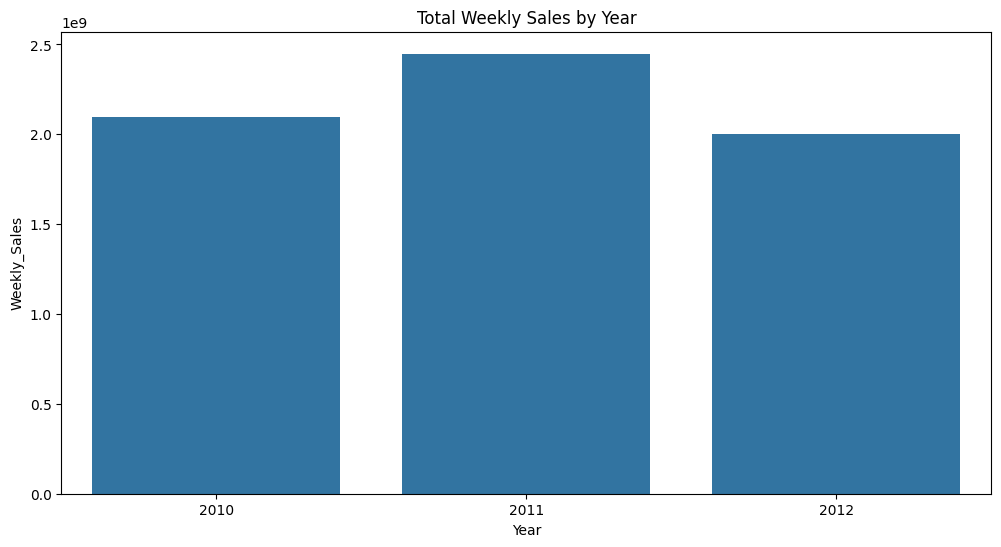

In [68]:
df['Year'] = df['Date'].dt.year
sales_by_year=df.groupby('Year')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_year, x='Year', y='Weekly_Sales')
plt.title('Total Weekly Sales by Year')
plt.show()

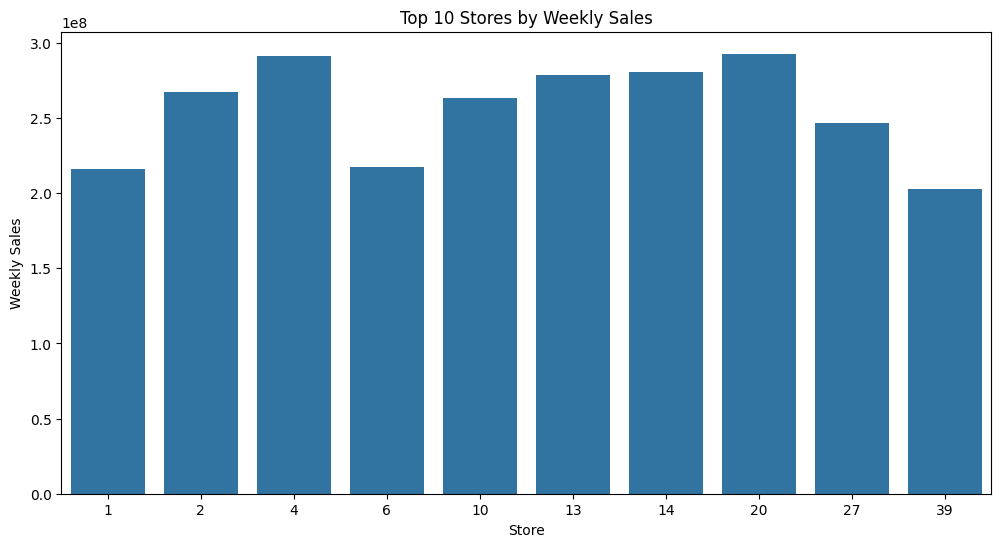

In [69]:
top_stores=df.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values(by='Weekly_Sales',ascending=False)
top_stores.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_stores.head(10), x='Store',y='Weekly_Sales')
plt.title('Top 10 Stores by Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

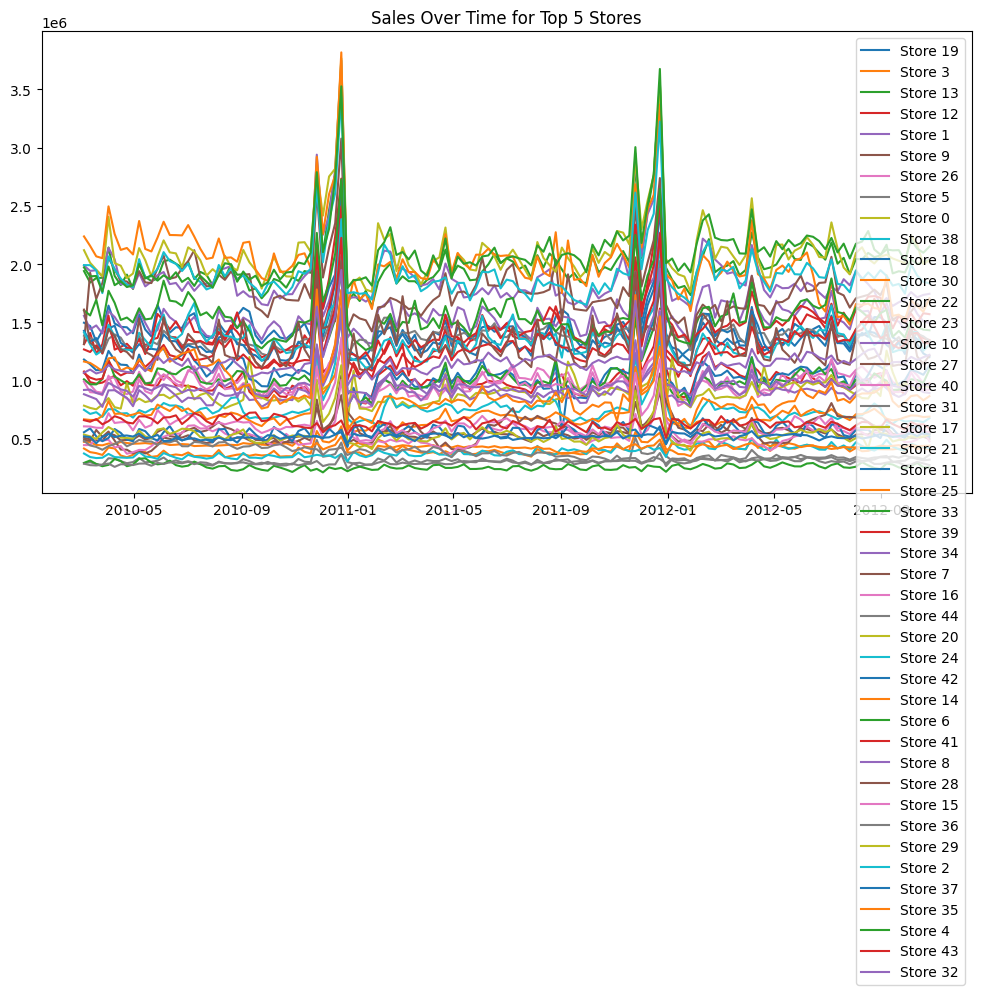

In [70]:
plt.figure(figsize=(12,6))
for store in top_stores.index:
    temp = df[df['Store'] == store]
    plt.plot(temp['Date'], temp['Weekly_Sales'], label=f'Store {store}')
plt.title('Sales Over Time for Top 5 Stores')
plt.legend()
plt.show()


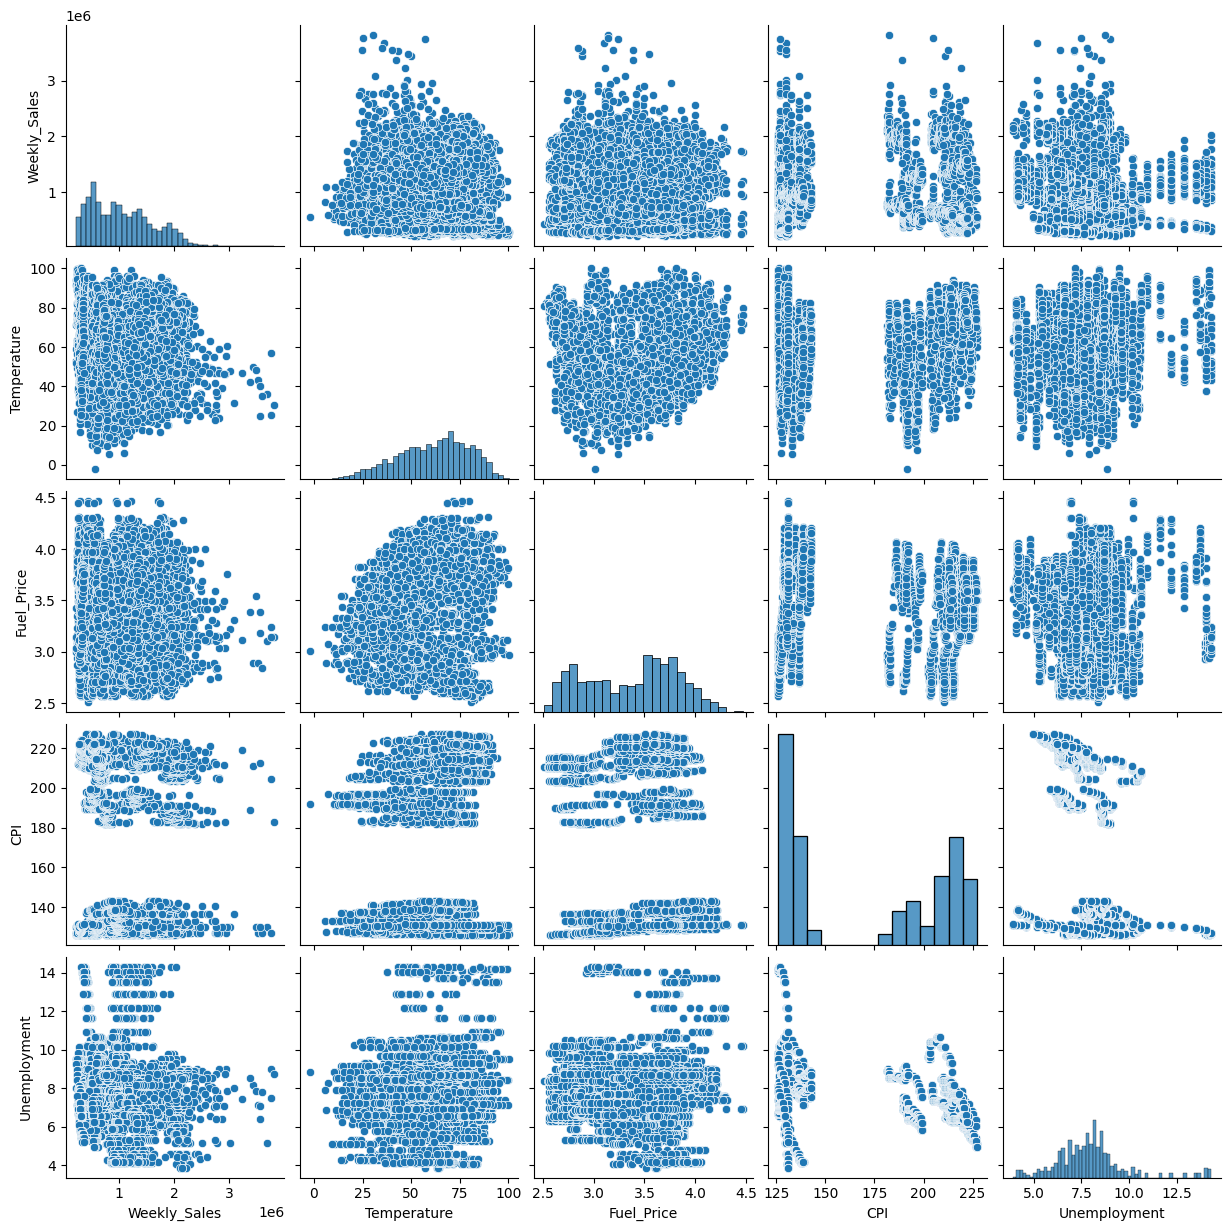

In [71]:
sns.pairplot(df, vars=['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])
plt.show()

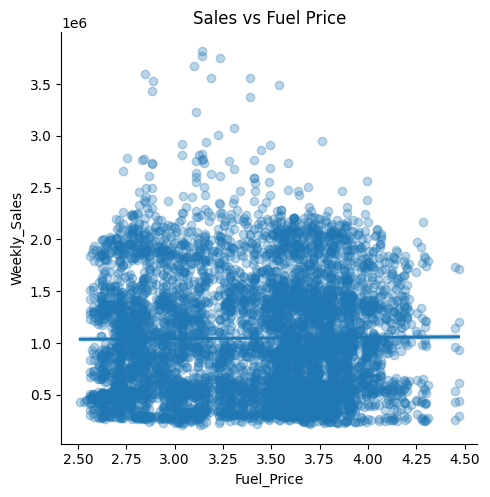

In [72]:
sns.lmplot(data=df, x='Fuel_Price', y='Weekly_Sales', scatter_kws={'alpha':0.3})
plt.title('Sales vs Fuel Price')
plt.show()


In [81]:
holidays= ['Super_Bowl', 'Thanksgiving', 'Christmas']
for h in holidays:
    avg_sales=df[df[h]==1].groupby('Store')['Weekly_Sales'].mean().reset_index()
    print(f"{h}:\n{avg_sales}\n")

Super_Bowl:
    Store  Weekly_Sales
0       1   1726046.180
1       2   2135682.145
2       3    451909.340
3       4   2281253.965
4       5    330415.210
5       6   1553762.045
6       7    561681.950
7       8   1008773.905
8       9    582507.570
9      10   2167002.055
10     11   1496762.330
11     12   1142876.210
12     13   2006861.735
13     14   2028830.635
14     15    605541.285
15     16    470286.930
16     17    846688.580
17     18   1141834.545
18     19   1465173.890
19     20   2337183.210
20     21    771280.650
21     22   1021827.200
22     23   1304115.235
23     24   1372350.745
24     25    637325.580
25     26   1045858.360
26     27   1643915.060
27     28   1485133.765
28     29    548113.915
29     30    461143.615
30     31   1533459.450
31     32   1126890.030
32     33    279375.660
33     34   1031656.345
34     35    854518.655
35     36    368621.550
36     37    524777.890
37     38    423729.920
38     39   1335441.165
39     40    965862.500
40  

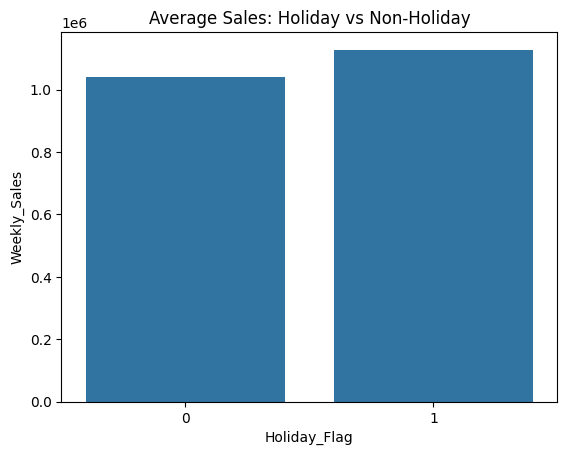

In [82]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
sns.barplot(data=holiday_sales, x='Holiday_Flag', y='Weekly_Sales')
plt.title('Average Sales: Holiday vs Non-Holiday')
plt.show()


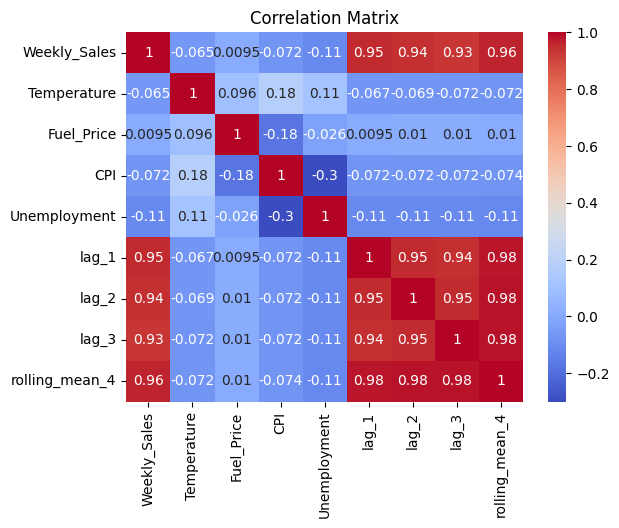

In [83]:
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean_4']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Feature Engineering

In [84]:
df['DayOfWeek'] = df['Date'].dt.dayofweek

C:\Users\karim\AppData\Local\Temp\ipykernel_1348\1518102950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['Date'].dt.dayofweek


In [85]:
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df['Season'] = df['Date'].apply(get_season)


C:\Users\karim\AppData\Local\Temp\ipykernel_1348\2140884119.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Date'].apply(get_season)


In [86]:
df['Time_Index'] = (df['Date'] - df['Date'].min()).dt.days // 7


C:\Users\karim\AppData\Local\Temp\ipykernel_1348\410354153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_Index'] = (df['Date'] - df['Date'].min()).dt.days // 7


In [90]:
df['sales_change'] = df['Weekly_Sales'] / df['lag_1'] - 1

C:\Users\karim\AppData\Local\Temp\ipykernel_1348\410284193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sales_change'] = df['Weekly_Sales'] / df['lag_1'] - 1


In [92]:
df['CPI_Unemployment'] = df['CPI'] * df['Unemployment']
df['Temperature_Fuel'] = df['Temperature'] * df['Fuel_Price']

C:\Users\karim\AppData\Local\Temp\ipykernel_1348\1515687712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CPI_Unemployment'] = df['CPI'] * df['Unemployment']
C:\Users\karim\AppData\Local\Temp\ipykernel_1348\1515687712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temperature_Fuel'] = df['Temperature'] * df['Fuel_Price']


In [93]:
store_avg_sales = df.groupby('Store')['Weekly_Sales'].transform('mean')
df['Store_Avg_Sales'] = store_avg_sales


C:\Users\karim\AppData\Local\Temp\ipykernel_1348\1939115889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Store_Avg_Sales'] = store_avg_sales


In [94]:
df['Sales_vs_Store_Avg'] = df['Weekly_Sales'] / df['Store_Avg_Sales']


C:\Users\karim\AppData\Local\Temp\ipykernel_1348\3268061320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_vs_Store_Avg'] = df['Weekly_Sales'] / df['Store_Avg_Sales']


In [95]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Thanksgiving,...,Week,Year,DayOfWeek,Season,Time_Index,sales_change,CPI_Unemployment,Temperature_Fuel,Store_Avg_Sales,Sales_vs_Store_Avg
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,...,9,2010,4,Spring,0,0.102913,1713.204258,122.06250,1.554644e+06,1.000105
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,0,0,...,10,2010,4,Spring,1,-0.074135,1713.451491,154.12593,1.554644e+06,0.925962
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,0,0,...,11,2010,4,Spring,2,0.022906,1712.113937,148.45760,1.554644e+06,0.947173
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,0,0,...,12,2010,4,Spring,3,-0.046238,1710.512252,140.56140,1.554644e+06,0.903377
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,0,0,...,13,2010,4,Spring,4,0.135670,1646.086073,169.31213,1.554644e+06,1.025938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,0,0,...,39,2012,4,Fall,134,-0.013708,1667.445735,259.32536,7.860756e+05,0.907259
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,0,0,...,40,2012,4,Fall,135,0.028438,1665.540956,258.58665,7.860756e+05,0.933059
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,0,0,...,41,2012,4,Fall,136,0.001376,1666.900409,217.88000,7.860756e+05,0.934343
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,0,0,...,42,2012,4,Fall,137,-0.022246,1666.931513,224.12943,7.860756e+05,0.913558


In [96]:
df.dtypes

Store                          int64
Date                  datetime64[ns]
Weekly_Sales                 float64
Holiday_Flag                   int64
Temperature                  float64
Fuel_Price                   float64
CPI                          float64
Unemployment                 float64
Super_Bowl                     int64
Thanksgiving                   int64
Christmas                      int64
lag_1                        float64
lag_2                        float64
lag_3                        float64
rolling_mean_4               float64
Month                          int32
Week                          UInt32
Year                           int32
DayOfWeek                      int32
Season                        object
Time_Index                     int64
sales_change                 float64
CPI_Unemployment             float64
Temperature_Fuel             float64
Store_Avg_Sales              float64
Sales_vs_Store_Avg           float64
dtype: object

Machine Learning

In [102]:
from sklearn.preprocessing import LabelEncoder

# Кодируем Season
le = LabelEncoder()
df['Season'] = le.fit_transform(df['Season'])

# Разделяем train и test по дате
train = df[df['Date'] < '2012-01-01']
test = df[df['Date'] >= '2012-01-01']

X_train = train.drop(columns=['Weekly_Sales', 'Date'])
y_train = train['Weekly_Sales']
X_test = test.drop(columns=['Weekly_Sales', 'Date'])
y_test = test['Weekly_Sales']

C:\Users\karim\AppData\Local\Temp\ipykernel_1348\128700522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = le.fit_transform(df['Season'])


LINEAR REGRESSION

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error 

lr= LinearRegression()
lr.fit(X_train, y_train)

y_pred=lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 43409.71114530849
MAE: 30335.07282039938


In [107]:
print(df['Weekly_Sales'].mean())


1046664.4291079136


XGBOOST

In [132]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

model=xgb.XGBRegressor   (
    n_estimators= 1000,
    learning_rate= 0.03,
    max_depth= 3,
    subsample= 0.6,
    colsample_bytree= 0.6,
    random_state= 42,
    reg_alpha=0.1,
    reg_lambda=1,
)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 17633.98428117594
MAE: 13091.51929877261


,weight,gain,cover
rolling_mean_4,492.0,8.405074e+12,931.853638
Store_Avg_Sales,625.0,6.828564e+12,1174.502441
lag_1,933.0,3.046928e+12,992.759888
lag_3,316.0,9.441549e+11,782.484192
Christmas,34.0,6.697318e+11,786.294128
Sales_vs_Store_Avg,962.0,6.237376e+11,1039.986450
lag_2,551.0,6.211214e+11,887.491821
sales_change,916.0,4.553729e+11,1202.816650
Thanksgiving,53.0,1.150819e+11,453.792450
Month,84.0,7.320579e+10,1212.238037


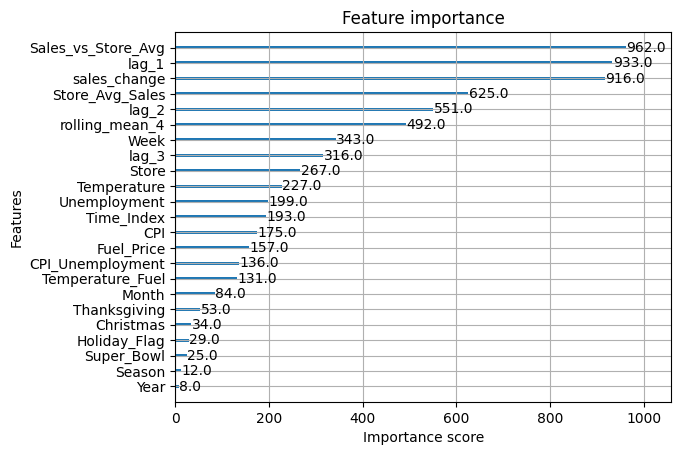

In [154]:
xgb.plot_importance(model)

importance_types = ['weight', 'gain', 'cover']
importance_df = pd.DataFrame({
    t: pd.Series(model.get_booster().get_score(importance_type=t))
    for t in importance_types
}).fillna(0).sort_values('gain', ascending=False)

display(importance_df) 

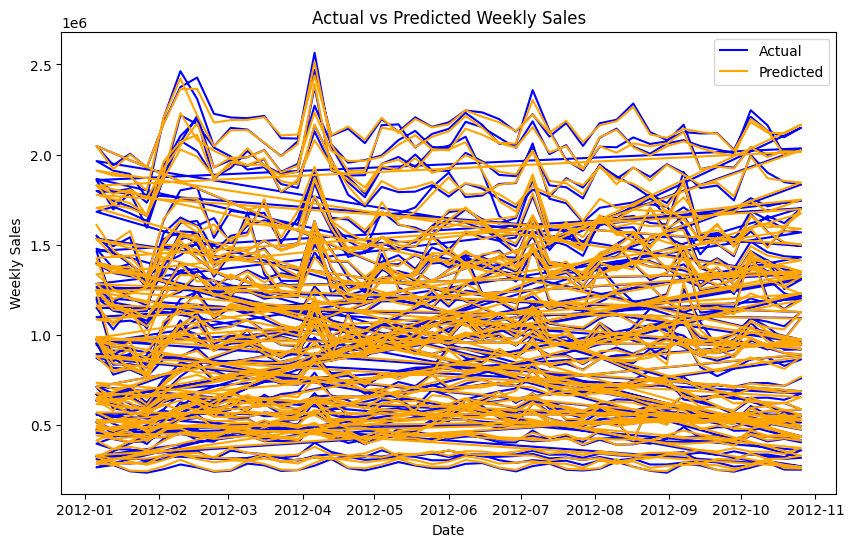

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], y_test, label='Actual', color='blue')
plt.plot(test['Date'], y_pred, label='Predicted', color='orange')
plt.legend()
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

In [139]:
test_plot = test.copy()
test_plot['Predicted'] = y_pred

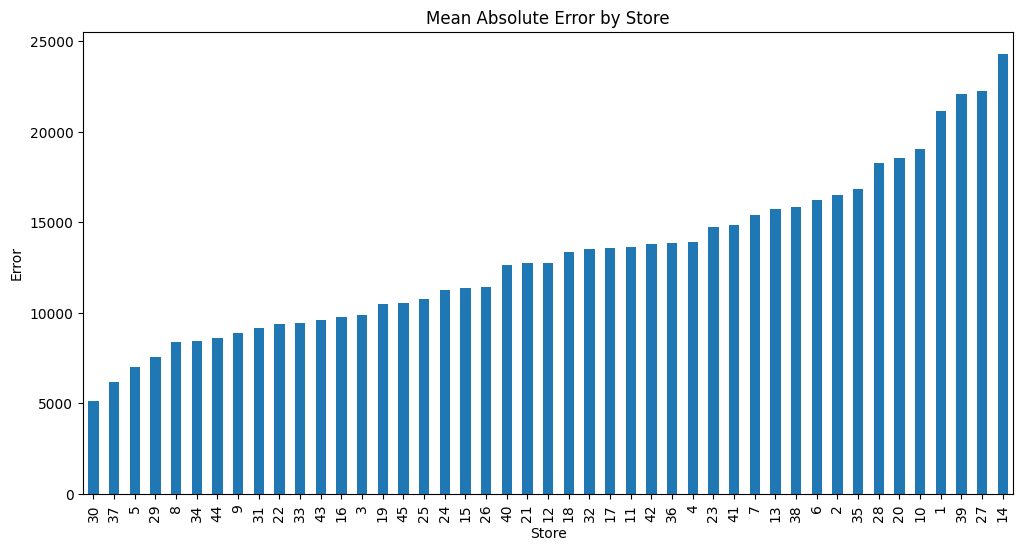

In [140]:
test_plot['Error'] = abs(test_plot['Weekly_Sales'] - test_plot['Predicted'])
store_errors = test_plot.groupby('Store')['Error'].mean().sort_values()

plt.figure(figsize=(12,6))
store_errors.plot(kind='bar')
plt.title('Mean Absolute Error by Store')
plt.ylabel('Error')
plt.show()


In [141]:
test_plot.groupby(['Store', 'Super_Bowl', 'Thanksgiving', 'Christmas'])['Error'].mean()

Store  Super_Bowl  Thanksgiving  Christmas
1      0           0             0            20572.668452
       1           0             0            44998.805000
2      0           0             0            16135.881905
       1           0             0            32246.805000
3      0           0             0             9816.972113
                                                  ...     
43     1           0             0            14513.037500
44     0           0             0             8529.292470
       1           0             0            11139.280000
45     0           0             0            10562.055179
       1           0             0             8913.870000
Name: Error, Length: 90, dtype: float64

In [142]:
holiday_error = test_plot.groupby(['Super_Bowl', 'Thanksgiving', 'Christmas'])['Error'].mean()
print(holiday_error)

Super_Bowl  Thanksgiving  Christmas
0           0             0            12940.669446
1           0             0            19427.213111
Name: Error, dtype: float64


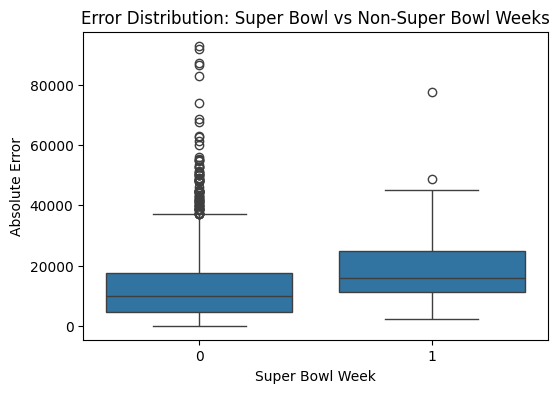

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(data=test_plot, x='Super_Bowl', y='Error')
plt.title('Error Distribution: Super Bowl vs Non-Super Bowl Weeks')
plt.xlabel('Super Bowl Week')
plt.ylabel('Absolute Error')
plt.show()

TESTING

In [137]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
rmse_scores = []

for train_idx, val_idx in tscv.split(X_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model.fit(X_tr, y_tr)
    y_val_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    rmse_scores.append(rmse)

print("Cross-validated RMSE:", np.mean(rmse_scores))


Cross-validated RMSE: 51423.167620805754


In [ ]:
new_data = pd.DataFrame({
    'Store': [1, 2],
    'Holiday_Flag': [0, 1],
    'Temperature': [40, 55],
    'Fuel_Price': [3.2, 3.0],
    'CPI': [220, 222],
    'Unemployment': [7.5, 8.0],
    'Super_Bowl': [0, 1],
    'Thanksgiving': [0, 0],
    'Christmas': [0, 0],
    'lag_1': [2000000, 1800000],
    'lag_2': [2100000, 1750000],
    'lag_3': [2050000, 1900000],
    'rolling_mean_4': [2037500, 1812500],
    'Month': [2, 2],
    'Week': [6, 6],
    'Year': [2013, 2013],
    'DayOfWeek': [5, 5],
    'Season': [1, 1],
    'Time_Index': [150, 150],
    'sales_change': [0.02, -0.01],
    'CPI_Unemployment': [220*7.5, 222*8.0],
    'Temperature_Fuel': [40*3.2, 55*3.0],
    'Store_Avg_Sales': [2000000, 1800000],
    'Sales_vs_Store_Avg': [1.02, 0.98]
})

predictions = model.predict(new_data)
print(predictions)

[1992821.2 1827832.4]


In [ ]:
scenarios = pd.DataFrame({
    'Store': [1, 1, 1],
    'Holiday_Flag': [0, 1, 0],
    'Temperature': [50, 50, -5],       # normal temperature, Super Bowl week, extreme cold
    'Fuel_Price': [3.0, 3.0, 3.0],
    'CPI': [220, 220, 220],
    'Unemployment': [7.5, 7.5, 7.5],
    'Super_Bowl': [0, 1, 0],
    'Thanksgiving': [0, 0, 0],
    'Christmas': [0, 0, 0],
    'lag_1': [2000000, 2000000, 2000000],
    'lag_2': [1950000, 1950000, 1950000],
    'lag_3': [1980000, 1980000, 1980000],
    'rolling_mean_4': [1982500, 1982500, 1982500],
    'Month': [2, 2, 1],
    'Week': [6, 6, 3],
    'Year': [2013, 2013, 2013],
    'DayOfWeek': [5, 5, 5],
    'Season': [1, 1, 0],               # winter
    'Time_Index': [150, 150, 150],
    'sales_change': [0, 0, 0],
    'CPI_Unemployment': [220*7.5, 220*7.5, 220*7.5],
    'Temperature_Fuel': [50*3.0, 50*3.0, -5*3.0],
    'Store_Avg_Sales': [2000000, 2000000, 2000000],
    'Sales_vs_Store_Avg': [1, 1, 1]
})


In [147]:
predictions = model.predict(scenarios)
scenarios['Predicted_Sales'] = predictions
print(scenarios[['Store', 'Super_Bowl', 'Temperature', 'Predicted_Sales']])

   Store  Super_Bowl  Temperature  Predicted_Sales
0      1           0           50      1972426.500
1      1           1           50      2004732.625
2      1           0           -5      1928077.500


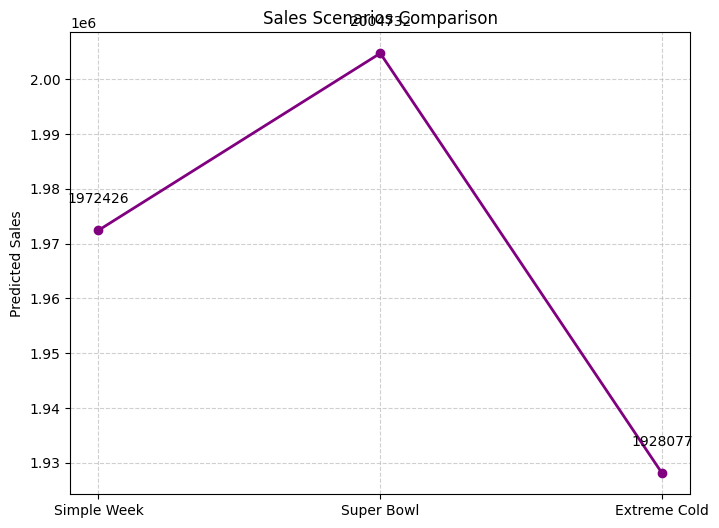

In [150]:
labels = ['Simple Week', 'Super Bowl', 'Extreme Cold']
values = scenarios['Predicted_Sales']

plt.figure(figsize=(8, 6))
plt.plot(labels, values, marker='o', linewidth=2, color='purple')
for i, v in enumerate(values):
    plt.text(i, v + 5000, f'{int(v)}', ha='center', fontsize=10)
plt.ylabel('Predicted Sales')
plt.title('Sales Scenarios Comparison')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [153]:
scenarios.to_csv("scenario_forecasts.csv", index=False)

In [151]:
import joblib
joblib.dump(model, "xgb_walmart_sales.pkl")

['xgb_walmart_sales.pkl']

METRICS

In [152]:
accuracy_10 = ((abs(y_test - y_pred) / y_test) <= 0.1).mean()
print("Accuracy (±10%):", accuracy_10)

Accuracy (±10%): 0.999483204134367


In [155]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.9989197170107513
